# **LA_07_1_Symmetric_matrices**

#### **Symmetric matrices**

Recall

**Definition.** Matrix $A$ is said to be *symmetric* if $A^t=A$.

Plenty of matrices are symmetric:

1. Diagonal matrices

2. Distances matrices of pairwise distances between some objects.

3. Adjacency matrices of undirected graphs

4. Orthogonal projections matrices

5. Hessian matrices, i.e. matrices of second-order partial derivatives of a scalar-valued function

6. Gram matrices of scalar products

and other...

We are going to discuss their properties. We consider only <u> real matrices and euclidean spaces</u> in this topic.

#### **Adjoint operator**

First question is what linear operators correspond to symmetrical matrices. Let $\varphi: V\rightarrow V$ be a linear operator in euclidean space $V$.

**Theorem [on linear oprator adjunction].** Let $\Phi$ be the matrix of $\varphi$ in an orthonormal basis $u$. Then $\langle \Phi x,y \rangle = \langle x, \Phi^t y \rangle$ for every $x,y\in V$ given by their coordinates in $u$.

**Definition** Linear operator $\varphi^*$ is said to be *adjoint* to $\varphi$ if $\langle \varphi x,y \rangle = \langle x, \varphi^* y \rangle$ for every $x,y\in V$.

$\varphi$ is said to be *self-adjoint* if $\varphi = \varphi^*$.

As follows from the theorem symmetrical matrices are the matrices of self-adjoint operators in orthonormal bases.

#### **Spectral theorem for symmetrical matrices**

The next theorem states that symmetric matrices are not only diagonalizable but also it can be done in orthonormal basis

**Theorem [spectral theorem for symmetric matrices].** Let $S$ be a real symmetric matrix. Then
1. All the eigenvalues of $S$ are real.
2. Eigenvectors of $S$ corresponding to different eigenvalues are orthogonal.
3. There exists an orthogonal matrix $U$ with eigenvectors of $S$ as columns such as $S=U\Lambda U^t$, where $\Lambda$ is a diagonal matrix with eigenvalues as diagonal entries.

Note that $U^t$ is just $U^{-1}$ for orthogonal $U$.

The Spectral theorem says that from the geometrical point of view the self-adjoint transformation is a composition of some orthogonal transformation (e.g. rotation or reflection), scaling along some orthogonal axis and the inverse orthogonal transformation.

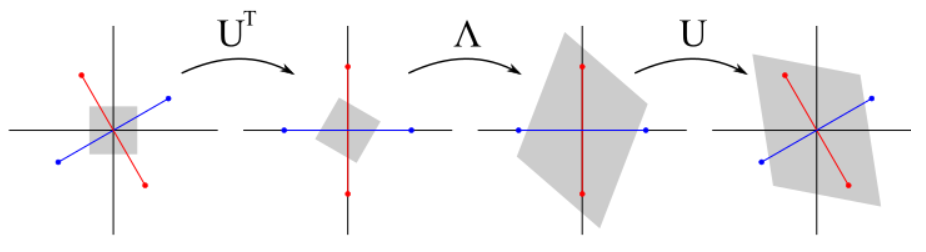

The eigendecomposition $S=U\Lambda U^t$ can also be written as
$$S = \begin{pmatrix} | &  & | \\ u_1 & \dots & u_n \\| &  & | \end{pmatrix}\begin{pmatrix} \lambda_1 &  &  \\  & \dots & \\   &  & \lambda_n \end{pmatrix}
\begin{pmatrix} - & u_1 & - \\  & \dots &  \\ - & u_n & - \end{pmatrix} = \lambda_1u_1u_1^t+\dots + \lambda_nu_nu_n^t$$
It is called a *rank one decomposition* since $u_ju_j^t$ are matrices of rank 1

Rank one decomposition can be generalized to arbitrary (not only symmetric and not only square) matrices through the so called singular value decomposition (SVD), but it is a topic for advanced linear algebra course.



---

#### **Coding sample: symmetric matrix diagonalization**


In [26]:
import numpy as np

# matrix to diagonalize
S = np.array([[1, 2, 3], [2, 4, 1], [3 , 1, 5]])

eigenvalues, eigenvectors = np.linalg.eig(S)

Lambda = np.diag(eigenvalues)

U = eigenvectors

check = np.allclose(S, ((U @ Lambda) @ U.T))

print(f'Diagonalization of S= \n {S}\n is U Lambda U^t with U = \n {U} \n and Lambda = \n {Lambda} \n')
print(f'If U Lambda U^t = S: {check}')

Diagonalization of S= 
 [[1 2 3]
 [2 4 1]
 [3 1 5]]
 is U Lambda U^t with U = 
 [[-0.87716982  0.47994164 -0.015137  ]
 [ 0.2733656   0.47320619 -0.83746472]
 [ 0.39477127  0.73873671  0.54628172]] 
 and Lambda = 
 [[-0.97344343  0.          0.        ]
 [ 0.          7.58959802  0.        ]
 [ 0.          0.          3.38384541]] 

If U Lambda U^t = S: True




---



#### **Linear algebraic view on data variance**

Another important example of symmetric matrix appears in this subsection.

Data often can be represented as a number of objects each having some numerical characterisctics (features), i.e. each object can be given as a vector. To characterize the whole dataset various statistical values are used. The most common is mean value which is $\overline{a} = \dfrac{a_1+\dots +a_N}{N}$ for datapoints $a_1, \dots, a_N$.  In what follows we suppose for simplicity that data is transformed such as its mean is zero. It can be done by subtraction $\overline{a}$ from all points $a_j \rightarrow a_j-\overline{a}$.

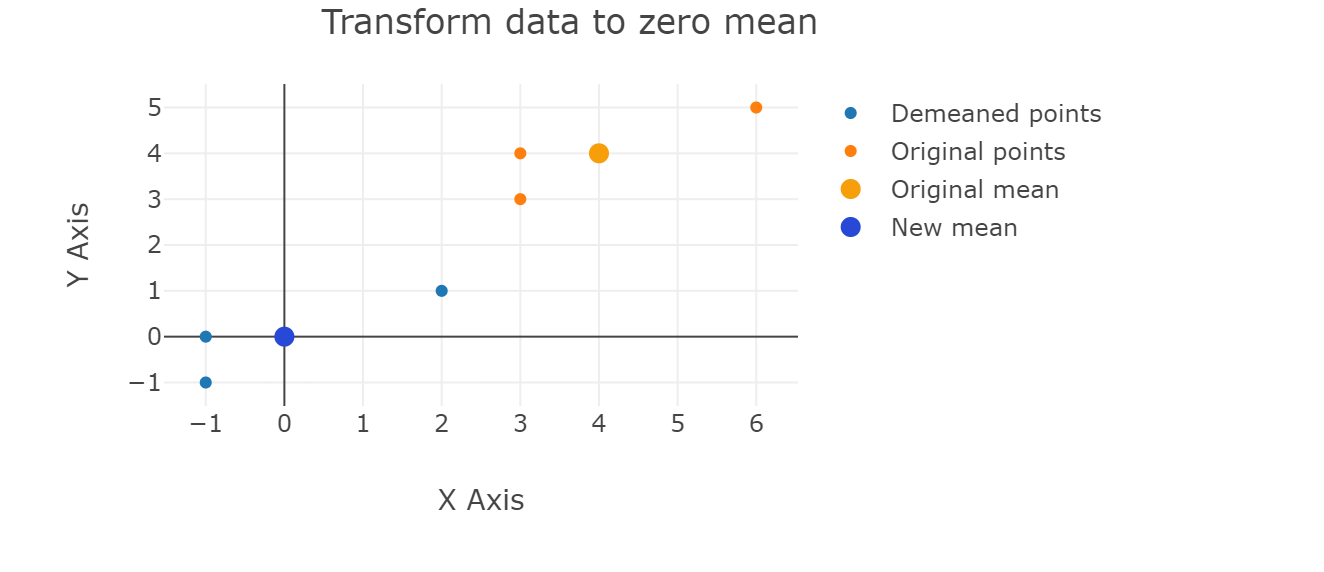

Another statistical characteristic is a *variance* which characterize the spreading of the data around its mean.

**Definition.** For data points $a_1, \dots, a_N$ with zero mean a *variance* is $V = \dfrac{1}{N}\displaystyle\sum_{j=1}^N \|a_j\|^2$.

We will explain how to decompose the variance along orthogonal axis. Let $u_1, \dots , u_n$ be an orthonormal basis. Then projecting data points on the $u$- axes gives us
$a = \displaystyle\sum_{i=1}^n \langle a, u_i\rangle u_i$ for each $a$ and hence
$\|a\|^2 = \displaystyle\sum_{i=1}^n\langle a, u_i\rangle^2 $
by Pythagorian theorem.

By substitution norms in $V = \dfrac{1}{N}\displaystyle\sum_{j=1}^N \|a_j\|^2$ we get $$V=V_{u_1}+\dots+V_{u_n}, $$
where $V_{u_j} = \dfrac{1}{N}\displaystyle\sum_{j=1}^{N}\langle a_j, u_i\rangle^2$ is a variance along axis $u_j$.

To calculate variance along the axis $u$ we consider the matrix $A$ with columns $a_j$. Then $A^t u = \begin{pmatrix} \langle a_1, u\rangle \\ \dots \\ \langle a_N, u\rangle  \end{pmatrix}$ and $$V_{u} = \dfrac{1}{N}\displaystyle\sum_{j=1}^{N}\langle a_j, u\rangle^2 = \dfrac{1}{N}\|A^tu\|^2=\dfrac{1}{N}(A^tu)^t(A^tu)=u^t(\dfrac{1}{N}AA^t)u = u^tC u,$$
where $C = \dfrac{1}{N}AA^t$ is a *covariance* matrix.

Covariance matrix is a symmetric one and characterize the variability of data. If coordinates of data points $a_j$ are given in the standard basis, the diagonal entries of $C$ are variances of $a_j$ along axis of standard basis.

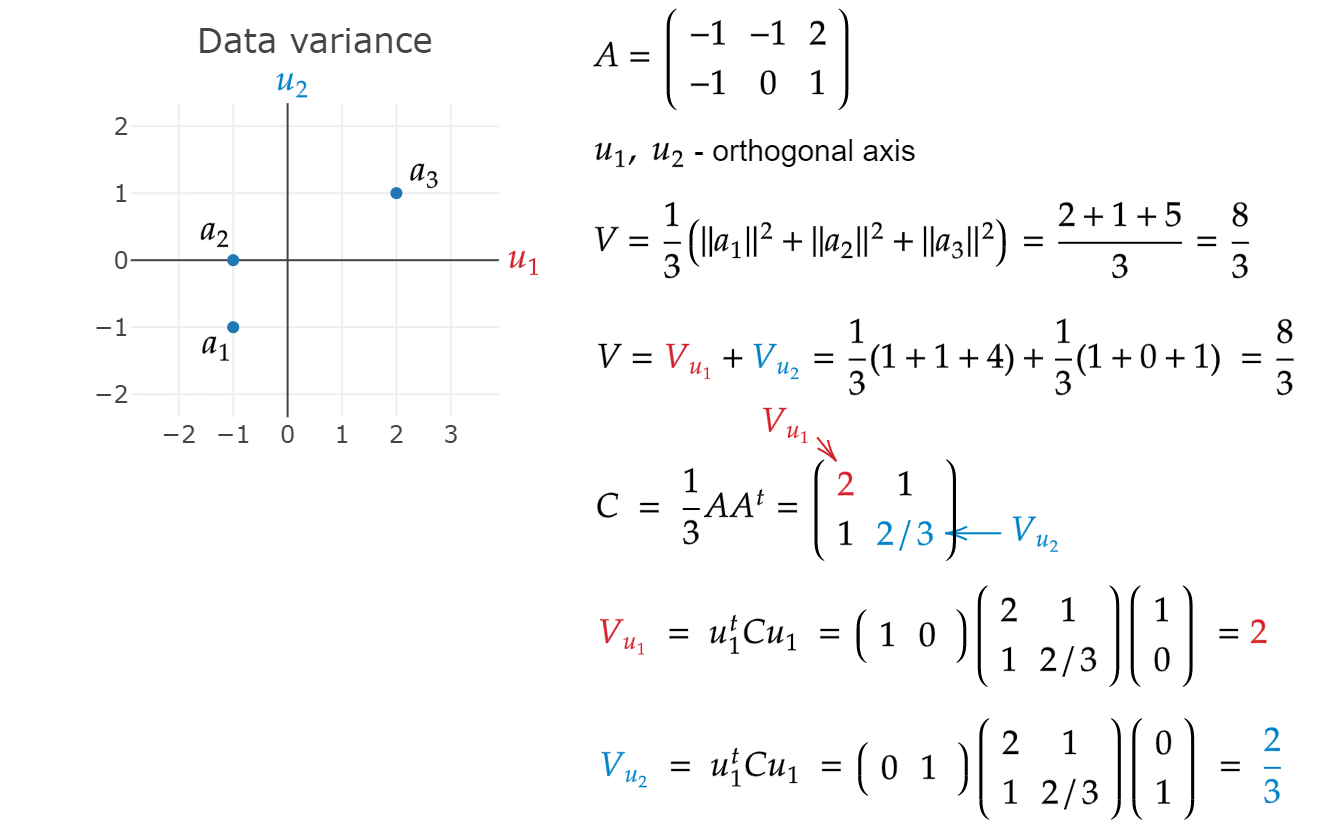



---

#### **Coding sample: covariance matrix and data variance**

See the image above

In [7]:
import numpy as np

# number of data points
N = 3

# it is convinient to give the data points as the rows of a matrix
data = np.array([[-1, -1], [-1, 0], [2, 1]])

# but for future calculation we use A with datapoints as columns
A = data.T

# covariance matrix (columns of A.T are datapoints)
C = 1/N*(A @ A.T)

#numpy covariance matrix (bias=True should be by some statistical reasons)
C_np = np.cov(A, bias=True)

# orthonormal axis (standard basis)
u1 = np.array([1, 0])
u2 = np.array([0, 1])
basis = np.array((u1, u2))

#variance as the sum of norms
V_norm = 0
for a in data:
  V_norm += np.linalg.norm(a)**2
V_norm *= 1/N

#total variance as a sum of axis-variances
V=0
for u in basis:
  V += u @ C @ u.T

#numpy total variance (axis=1 indicates, that columns are data points)
V_np = np.var(A, axis=1).sum()


print(f'Data points are the columns of \n {A} \n')

print(f'Covariance matrix is C = \n {C} \n')
print(f'Numpy covariance matrix is C_np = \n {C_np} \n')
print(f'Are covariance matrices the same: {np.allclose(C, C_np)}\n')


print(f'Total variance as a sum of norms is V_norm = {V_norm:.2f}')
print(f'Total variance as a sum along axis is V = {V:.2f}')
print(f'Numpy total variance is V_np = {V_np:.2f}')
print(f'Are results of variance calculation the same: {np.isclose(V, V_np) and np.isclose(V, V_norm)}')

Data points are the columns of 
 [[-1 -1  2]
 [-1  0  1]] 

Covariance matrix is C = 
 [[2.         1.        ]
 [1.         0.66666667]] 

Numpy covariance matrix is C_np = 
 [[2.         1.        ]
 [1.         0.66666667]] 

Are covariance matrices the same: True

Total variance as a sum of norms is V_norm = 2.67
Total variance as a sum along axis is V = 2.67
Numpy total variance is V_np = 2.67
Are results of variance calculation the same: True




---

